## Descripción del proyecto
Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Condiciones:

Característica objetivo: la columna `'EndDate'` es igual a `'No'`.

Métrica principal: AUC-ROC.

Métrica adicional: exactitud.

Criterios de evaluación:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

### Descripción de los datos 

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. 
- La información del contrato es válida HASTA el 1 de febrero de 2020.

## Análisis exploratorio de datos (Python)
### Etapas
Como analista de datos, el trabajo consiste en analizar conjuntos de datos para extraer información valiosa que permita tomar decisiones informadas. Este proceso implica varias etapas cruciales, entre ellas:

Una descripción general de los datos

El preprocesamiento de los datos

La prueba de hipótesis

### Inicialización e importación de librerias 
    - Importar librerías de pandas para crear graficas
    - Leer el conjunto de datos utilizamos pd.read_csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt # Graficos
import numpy as np # Prueba de Hipotesis
from scipy.stats import chi2_contingency
import seaborn as sns # Grafico Barras

from sklearn.model_selection import train_test_split # datos en entrenamiento, validación y uno de prueba
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder # estandarización de datos 

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr, spearmanr # Correlación por Raking
from sklearn.metrics import roc_curve # Calcular la curva ROC
from sklearn.metrics import recall_score # Calcular Recall
from sklearn.utils import shuffle # Submuestreo
from sklearn.preprocessing import StandardScaler, MinMaxScaler # estandarizar los datos 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix

### Cargar datasets
    - Identificamos el delimitador sep=";" para leer adecuadamente las tablas

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv') 
personal = pd.read_csv('/datasets/final_provider/personal.csv') 
phone = pd.read_csv('/datasets/final_provider/phone.csv') 
internet = pd.read_csv('/datasets/final_provider/internet.csv')

In [3]:
# modelos que se generen rapidos
# columnas mas importantes para la predición 
# menos caracteristicas
# Que variables influencias chatvalues 
# de forma global y especificas

### Exploración inicial de datos
    - Verificar info() para ver información de cada DataFrame 
    - Utlizamos head() para mostrar información del DataFrame
    - Utlizamos describe() para ver la descripción del DataFrame 

In [4]:
# Imprime la información general/resumida sobre el DataFrame de contract
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
# Imprime la información general/resumida sobre el DataFrame de personal
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
# Imprime la información general/resumida sobre el DataFrame de phone
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [8]:
# Imprime la información general/resumida sobre el DataFrame de contract
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [9]:
# Imprime la información general/resumida sobre el DataFrame de personal
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [10]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [11]:
# Imprime la información general/resumida sobre el DataFrame de phone
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


#### Corregir los datos

In [12]:
### Renombramos las columnas para que el código se vea más coherente con su estilo.
contract = contract.rename(columns={
    'customerID': 'customer_id', 
    'BeginDate': 'begin_date', 
    'EndDate':'end_date', 
    'Type': 'type', 
    'PaperlessBilling':'paperless_billing',
    'PaymentMethod':'payment_method',
    'MonthlyCharges': 'monthly_charges', 
    'TotalCharges': 'total_charges',   
})

### actualizar indice
contract.reset_index(drop=True, inplace=True)

In [13]:
contract.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')

In [14]:
# Eliminar el segmento de string '(automatico)'
contract['payment_method'] = contract['payment_method'].str.replace(r'\(automatic\)', '', regex=True)

# Eliminar también "(automatic)" de otras columnas, puedes aplicar esto a todas las columnas de tipo cadena (string):
for col in contract.select_dtypes(include='object').columns:
    contract[col] = contract[col].str.replace(r'\(automatic\)', '', regex=True)

# Mostrar el DataFrame modificado
display(contract['payment_method'].unique())


array(['Electronic check', 'Mailed check', 'Bank transfer ',
       'Credit card '], dtype=object)

In [15]:
# Renombramos las columnas para que el código se vea más coherente con su estilo.
personal = personal.rename(columns={
    'customerID': 'customer_id', 
    'SeniorCitizen': 'senior_citizen', 
    'Partner': 'partner', 'Dependents': 'dependents'
})
# actualizar indice
personal.reset_index(drop=True, inplace=True)

In [16]:
# datos personales del cliente;
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [17]:
# Renombramos las columnas para que el código se vea más coherente con su estilo.
internet = internet.rename(columns={
    'customerID': 'customer_id', 
    'InternetService': 'internet_service', 
    'OnlineSecurity':'online_security', 
    'OnlineBackup': 'online_backup', 
    'DeviceProtection':'device_rotection',
    'TechSupport':'tech_support',
    'StreamingTV': 'streaming_tv', 
    'StreamingMovies': 'streaming_movies',   
})

### actualizar indice
internet.reset_index(drop=True, inplace=True)

In [18]:
# información sobre los servicios de Internet;
internet.columns 

Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_rotection', 'tech_support', 'streaming_tv', 'streaming_movies'],
      dtype='object')

In [19]:
# Renombramos las columnas para que el código se vea más coherente con su estilo.
phone = phone.rename(columns={'customerID': 'customer_id', 'MultipleLines': 'multiple_lines'})

# actualizar indice
phone.reset_index(drop=True, inplace=True)

In [20]:
# información sobre los servicios telefónicos.
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [21]:
contract.describe()

,monthly_charges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [22]:
personal.describe()

,senior_citizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [23]:
internet.describe()

,customer_id,internet_service,online_security,online_backup,device_rotection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7931-PXHFC,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [24]:
internet.describe()

,customer_id,internet_service,online_security,online_backup,device_rotection,tech_support,streaming_tv,streaming_movies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7931-PXHFC,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [25]:
phone.describe()

,customer_id,multiple_lines
count,6361,6361
unique,6361,2
top,7931-PXHFC,No
freq,1,3390


###  Preprocesamiento de los datos
    - Reemplaza los nombres de las columnas (ponlos en minúsculas).
    - Sin espacios los nombres de las columnas
    - Se utilizan snake_case para el uso de varias palabras. 
    - Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
    - Identifica y completa valores ausentes con isna() sum()
    - Identifica y elimina los valores duplicados duplicated()  
    - Verifica y corrige los tipos de datos con dtype() 
    - Verificamos que los nombres esten bien escritos

#### Contract

In [26]:
type(contract)

pandas.core.frame.DataFrame

In [27]:
# Verifica si hay valores nulos
contract.isnull().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64

In [28]:
# Verifica valores duplicados explicitos
contract.duplicated().sum()

0

In [29]:
# Verificamos que la columna de tiempo sea de tipo fecha
contract['begin_date'] = pd.to_datetime(contract['begin_date'])

### Analisis columna "end_date" (borrar)

- Analisis columna "end_date"

1. Para convertir la columna 'end_date' a valores enteros en tu DataFrame de pandas, necesitas determinar cómo deseas que los valores se interpreten como enteros:

         A) Si, por ejemplo, EndDate contiene fechas en formato string, podrías convertirlas al número de días desde una 
         fecha específica. 
         B) Sin embargo, si EndDate contiene etiquetas como "Yes" o "No", debes convertirlas a 1 y 0 respectivamente.
         
2. Como la columba 'end_date' contiene ambos valores, para convertir una columna con datos de tipo objeto en datos binarios enteros. La función lambda convierte los valores "NO" en 0 y los valores de fecha en 1.

In [30]:
# Elegir en este caso, el caso positivo los que se van a ir yes = 1
# No = 0
# Yes = 1

In [31]:
# Revisar los valores en la columnna "end_date"
contract['end_date'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

In [32]:
# Muestra los valores únicos de la columna "EndDate"
sorted(contract['end_date'].unique())

['2019-10-01 00:00:00',
 '2019-11-01 00:00:00',
 '2019-12-01 00:00:00',
 '2020-01-01 00:00:00',
 'No']

In [33]:
# Reemplaza 'No' por 0 y las fechas por 1 en la columna "EndDate"
contract['end_date'] = contract['end_date'].apply(lambda x: 0 if x == 'No' else 1)

# Revisar los valores en la columnna "end_date"
contract['end_date'].value_counts()

0    5174
1    1869
Name: end_date, dtype: int64

In [34]:
contract.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date                      int64
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges                object
dtype: object

In [35]:
# Calcula el promedio de la columna "EndDate"
average_enddate = contract['end_date'].mean()
print("Promedio de end_date:", average_enddate)

Promedio de end_date: 0.2653698707936959


Proporción de usuarios que no han cancelado la suscripción
- 61,26% que NO a  cancelado la suscripción
- 26,53% corresponden a un tipo de dato fecha cualquiera

#### Personal

In [36]:
# Verifica si hay valores nulos
personal.isnull().sum()

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

In [37]:
# Contar duplicados explícitos
personal.duplicated().sum()

0

In [38]:
# Verificamos el tipo de dato 
personal.dtypes

customer_id       object
gender            object
senior_citizen     int64
partner           object
dependents        object
dtype: object

#### Internet

In [39]:
# Verifica si hay valores nulos
internet.isnull().sum()

customer_id         0
internet_service    0
online_security     0
online_backup       0
device_rotection    0
tech_support        0
streaming_tv        0
streaming_movies    0
dtype: int64

In [40]:
# Contar duplicados explícitos
internet.duplicated().sum()

0

In [41]:
# Verificamos el tipo de dato 
internet.dtypes

customer_id         object
internet_service    object
online_security     object
online_backup       object
device_rotection    object
tech_support        object
streaming_tv        object
streaming_movies    object
dtype: object

In [42]:
# la columna 'id' se conviertan a un valor entero
#internet['customer_id'] = internet['customer_id'].astype('int')

#### Phone

In [43]:
# Verifica si hay valores nulos
phone.isnull().sum()

customer_id       0
multiple_lines    0
dtype: int64

In [44]:
# Contar duplicados explícitos
phone.duplicated().sum()

0

In [45]:
# Verificamos el tipo de dato 
phone.dtypes

customer_id       object
multiple_lines    object
dtype: object

'Conclusión,
 importamos librerias de pandas para crear graficas. Leer el conjunto de datos utilizadno pd.read_csv()
 Verificamos la información para cada DataFrame utilizando head()
 
 Los encabezados de las tablas estan de acuerdo al buen estilo 
 - Todos los caracteres en minúsculas
 - Sin espacios los nombres de las columnas
 - Se utilizan snake_case para el uso de varias palabras. 

## Estudia el comportamiento de usuario

### Muestra la distribución de usuarios cada mes

In [46]:
# Creamos una nueva columna 'month'
contract["month"] = contract["begin_date"].dt.to_period("M").dt.start_time
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,month
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.85,29.85,2020-01-01
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.5,2017-04-01
2,3668-QPYBK,2019-10-01,1,Month-to-month,Yes,Mailed check,53.85,108.15,2019-10-01
3,7795-CFOCW,2016-05-01,0,One year,No,Bank transfer,42.30,1840.75,2016-05-01
4,9237-HQITU,2019-09-01,1,Month-to-month,Yes,Electronic check,70.70,151.65,2019-09-01


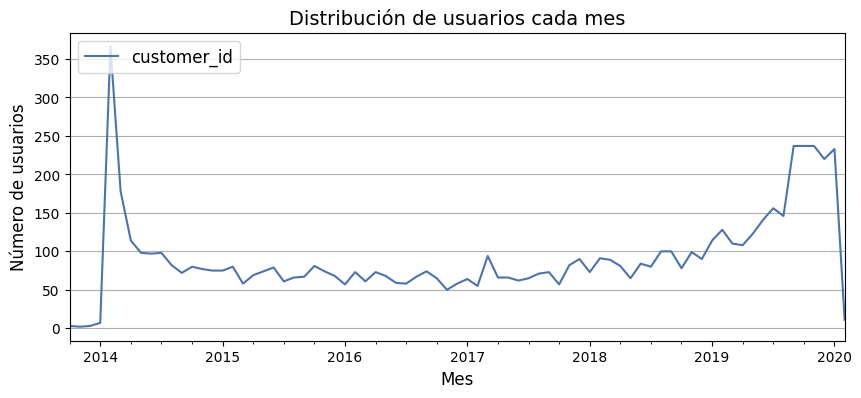

In [47]:
# Muestra la distribución de contract cada mes
# Define la paleta de colores
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974']

# Agrupa y cuenta los datos
data = contract.groupby('month')['customer_id'].count()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10,4))

# Traza la línea
data.plot(kind='line', color=colors[0], ax=ax)

# Personaliza la trama
plt.title('Distribución de usuarios cada mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de usuarios', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.grid(True)
ax.legend(fontsize=12, loc='upper left')

# Mostra la figura
plt.show()

In [48]:
# Muestra cuantos clientes se estan registrando por mes en promedio
contract.groupby("month")["customer_id"].count().mean()

91.46753246753246

Conclusión, con un promedio de 91,46% usuarios registrandose por mes.
* El año que registra el mayor nuemero de usuarios es febrero 2014 con 366 usuarios
* Comparamos que la cantidad de clientes ah disminuido en febrero 2020 con solo 11 usuarios registrados

In [49]:
# Revisar

### Prueba de hipotesis 
- Hipótesis: Los clientes que utilizan servicios adicionales como ProtecciónDeDispositivo y StreamingTV tienen una tasa de cancelación menor en comparación con aquellos que no utilizan estos servicios.

Procedimiento:

Formulación de hipótesis:

Hipótesis nula ( H0): No hay diferencia en la tasa de cancelación entre los clientes que utilizan servicios adicionales y los que no.

Hipótesis alternativa ( HA): Los clientes que utilizan servicios adicionales tienen una tasa de cancelación menor.

Recolección de datos: Obtén los datos de cancelación de clientes y el uso de servicios adicionales.

Análisis estadístico: Realiza un análisis de proporciones para comparar las tasas de cancelación entre los dos grupos (usuarios de servicios adicionales y no usuarios).

Prueba de hipótesis: Utiliza una prueba de chi-cuadrado para evaluar si la diferencia en las tasas de cancelación es significativa.

- Interpretación de resultados:

Si el valor p es menor que el nivel de significancia (por ejemplo, 0.05), rechaza la hipótesis nula y acepta la hipótesis alternativa.

De esta manera, podrás determinar si los servicios adicionales influyen en la retención de clientes.

In [50]:
# Para realizar este analisis debemos combinar los 4 dataframes existentes con una columna en comun 
# 1. contract, personal,Internet y phone tiene en comun la columna ID
# 2. La combinación de la tabla 1 con la 2 por la columna "month"

In [51]:
# Unimos contract y personal con un 'inner' join en la columna 'customer_id' # 6361 datos non-null quedando 632 valores fuera

# Unimos contract y personal con un 'left' join en la columna 'customer_id'
merged_df = pd.merge(contract, personal, on='customer_id', how='left')

# Unimos el resultado con phone también en la columna 'customer_id'
merged_id = pd.merge(merged_df, phone, on='customer_id', how='left')

# Rellenamos los valores nulos con 0
merged_id = merged_id.fillna(0)

# Imprimimos el resumen de información del DataFrame final
merged_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   int64         
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   month              7043 non-null   datetime64[ns]
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  multiple_lines     7043 non-null   object        
dtypes: datet

In [52]:
# Verificamos que el dataframe merged_id contiene una columna "month" con la cual lo uniremos al dataframe internet
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [53]:
# Asegúrate de que ambas columnas 'customer_id' estén en el mismo formato (por ejemplo, tipo 'object' o 'datetime')
# Unimos los DataFrames por la columna 'customer_id'
merged_df = pd.merge(merged_id, internet, on='customer_id', how='left') 

# Imprimimos el resumen de información del DataFrame final
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   int64         
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   month              7043 non-null   datetime64[ns]
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  multiple_lines     7043 non-null   object        
 14  internet

In [54]:
merged_df

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,month,gender,...,partner,dependents,multiple_lines,internet_service,online_security,online_backup,device_rotection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.85,29.85,2020-01-01,Female,...,Yes,No,0,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,1889.5,2017-04-01,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,1,Month-to-month,Yes,Mailed check,53.85,108.15,2019-10-01,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,0,One year,No,Bank transfer,42.30,1840.75,2016-05-01,Male,...,No,No,0,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,1,Month-to-month,Yes,Electronic check,70.70,151.65,2019-09-01,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,0,One year,Yes,Mailed check,84.80,1990.5,2018-02-01,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,0,One year,Yes,Credit card,103.20,7362.9,2014-02-01,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,2019-03-01,0,Month-to-month,Yes,Electronic check,29.60,346.45,2019-03-01,Female,...,Yes,Yes,0,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,2019-07-01,1,Month-to-month,Yes,Mailed check,74.40,306.6,2019-07-01,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [55]:
# Crear una columna binaria para indicar si el cliente usa servicios adicionales (1 si usa, 0 si no)
# Usamos 'multiple_lines' como indicador de servicios adicionales
merged_df['uses_additional_services'] = np.where(merged_df['multiple_lines'] == 'Yes', 1, 0)

# Calcular las tasas de cancelación para ambos grupos
# Aquí, asumimos que 'end_date' ya es binaria (1 = cancelado, 0 = no cancelado)
group_counts = pd.crosstab(merged_df['uses_additional_services'], merged_df['end_date'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(group_counts)

# Imprimir resultados
print("Tabla de contingencia:")
print(group_counts)
print("\nResultado de la prueba de chi-cuadrado:")
print(f"Chi-cuadrado: {chi2:.4f}")
print(f"Valor p: {p:.4f}")

# Interpretación
alpha = 0.05
if p < alpha:
    print("\nSe rechaza la hipótesis nula. Hay evidencia de que los clientes que usan servicios adicionales tienen una tasa de cancelación diferente.")
else:
    print("\nNo se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que los servicios adicionales influyen en la tasa de cancelación.")


Tabla de contingencia:
end_date                     0     1
uses_additional_services            
0                         3053  1019
1                         2121   850

Resultado de la prueba de chi-cuadrado:
Chi-cuadrado: 11.1433
Valor p: 0.0008

Se rechaza la hipótesis nula. Hay evidencia de que los clientes que usan servicios adicionales tienen una tasa de cancelación diferente.


- Conlclusión:
1. En este código, combinamos los datos necesarios de los cuatro DataFrames en uno solo.
2. Luego, creamos una columna en el nuevo DataFrame que nos indica si un cliente utiliza servicios adicionales.
3. A continuación, creamos una tabla de contingencia que muestra la cantidad de clientes que cancelan y la cantidad de clientes que no cancelan, desglosados por su uso de servicios adicionales.
4. Finalmente, utilizamos la función  de scipy para realizar la prueba de chi-cuadrado, que compara las tasas de cancelación entre los clientes que utilizan servicios adicionales y los que no. La función devuelve el valor chi-cuadrado, el valor p y otros datos estadísticos relevantes. Si el valor p es menor que el nivel de significancia (0.05 en este caso), rechazamos la hipótesis nula y aceptamos la hipótesis alternativa, lo que nos indica que los clientes que utilizan servicios adicionales tienen una tasa de cancelación menor.

### Analisis de distribuición de datos

#### Identificación de los 10 principales servicios adicionales más contratados por los usuarios de Interconnect.

In [56]:
# Lista de posibles servicios adicionales
services_columns = [
    'multiple_lines', 'internet_service', 'online_security', 
    'online_backup', 'device_rotection', 'tech_support', 
    'streaming_tv', 'streaming_movies'
]

# Contar la cantidad de usuarios que tienen contratado cada servicio adicional
services_counts = {}
for col in services_columns:
    services_counts[col] = (merged_df[col] == 'Yes').sum()

# Convertir el diccionario en un DataFrame para facilitar el ordenamiento
services_counts_df = pd.DataFrame(list(services_counts.items()), columns=['service', 'count'])

# Ordenar y seleccionar los 10 servicios más contratados
top_10_services = services_counts_df.sort_values(by='count', ascending=False).head(10)

print("Top 10 servicios adicionales más contratados:")
print(top_10_services)


Top 10 servicios adicionales más contratados:
            service  count
0    multiple_lines   2971
7  streaming_movies   2732
6      streaming_tv   2707
3     online_backup   2429
4  device_rotection   2422
5      tech_support   2044
2   online_security   2019
1  internet_service      0


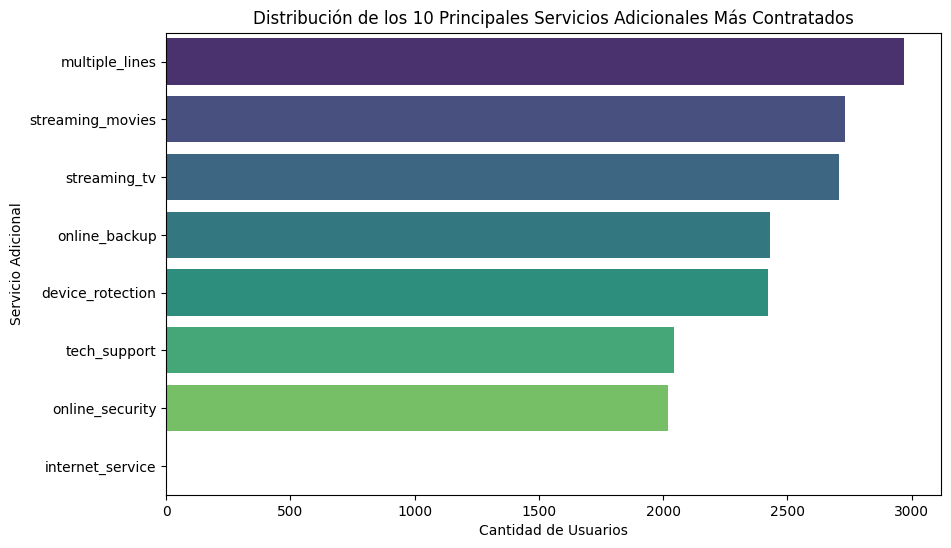

In [57]:
# Configuración del estilo del gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_services, x='count', y='service', palette='viridis')

# Títulos y etiquetas
plt.title("Distribución de los 10 Principales Servicios Adicionales Más Contratados")
plt.xlabel("Cantidad de Usuarios")
plt.ylabel("Servicio Adicional")

# Mostrar el gráfico
plt.show()


#### Conclusión del análisis de los 10 principales servicios adicionales más contratados:

La distribución de los 10 principales servicios adicionales contratados muestra que **"multiple_lines"** es el servicio más popular, con 2971 usuarios, lo que sugiere una alta preferencia de los clientes por tener múltiples líneas telefónicas. Los servicios de entretenimiento también son muy demandados, con **"streaming_movies"** y **"streaming_tv"** ocupando el segundo y tercer lugar, respectivamente. Esto indica un interés significativo en servicios de transmisión, lo que podría reflejar un cambio hacia opciones de entretenimiento en línea.

Los servicios de respaldo y protección, como **"online_backup"** y **"device_rotection"**, también figuran entre los más contratados, con más de 2400 usuarios cada uno. Esto sugiere que los clientes valoran la seguridad y protección de sus dispositivos y datos. Servicios adicionales de soporte y seguridad, como **"tech_support"** y **"online_security"**, también tienen una demanda considerable, aunque ligeramente menor.

Finalmente, el conteo cero para **"internet_service"** probablemente refleja datos incompletos o sugiere que no todos los clientes utilizan un servicio de internet directamente proporcionado. 

En general, los datos indican que los usuarios de Interconnect buscan un equilibrio entre servicios de comunicación (múltiples líneas), entretenimiento (transmisión de TV y películas) y seguridad (respaldo, protección de dispositivos y soporte técnico).

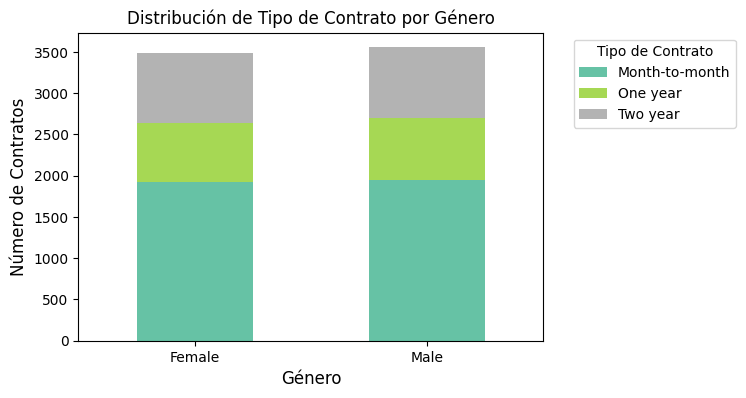

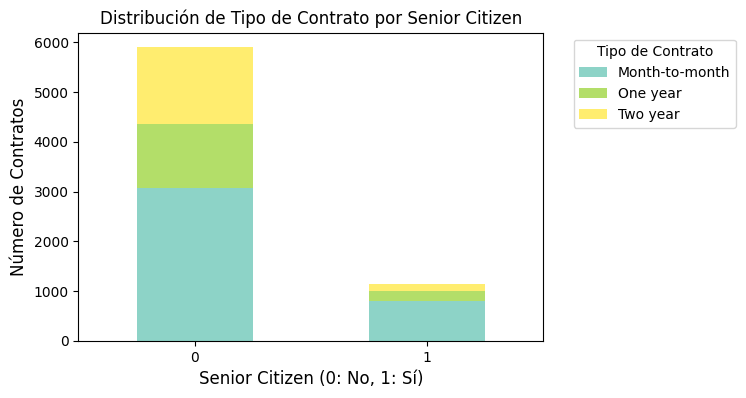

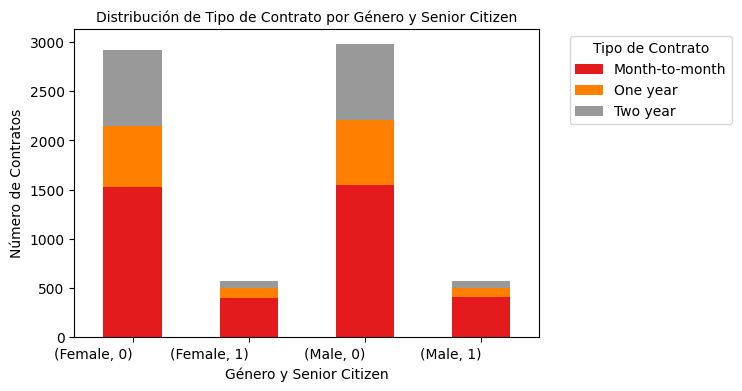

In [58]:
# 1. Análisis del tipo de contrato por género
# Contamos la cantidad de cada tipo de contrato por género
gender_contract_dist = merged_df.groupby(['gender', 'type']).size().unstack().fillna(0)

# Visualizamos los resultados en un gráfico de barras
gender_contract_dist.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')
plt.title('Distribución de Tipo de Contrato por Género', fontsize=12)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Contratos', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Tipo de Contrato", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Análisis del tipo de contrato por edad (en base a 'senior_citizen')
# Contamos la cantidad de cada tipo de contrato por si es "Senior Citizen" o no
senior_contract_dist = merged_df.groupby(['senior_citizen', 'type']).size().unstack().fillna(0)

# Visualizamos los resultados en un gráfico de barras
senior_contract_dist.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set3')
plt.title('Distribución de Tipo de Contrato por Senior Citizen', fontsize=12)
plt.xlabel('Senior Citizen (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Número de Contratos', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Tipo de Contrato", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Análisis conjunto del tipo de contrato por género y edad (senior_citizen)
# Realizamos un análisis cruzado entre género y senior_citizen para ver la interacción con el tipo de contrato
combined_contract_dist = merged_df.groupby(['gender', 'senior_citizen', 'type']).size().unstack().fillna(0)

# Visualizamos en un gráfico de barras apiladas
combined_contract_dist.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set1')
plt.title('Distribución de Tipo de Contrato por Género y Senior Citizen', fontsize=10)
plt.xlabel('Género y Senior Citizen', fontsize=10)
plt.ylabel('Número de Contratos', fontsize=10)
plt.xticks(rotation=0, ha='right')
plt.legend(title="Tipo de Contrato", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### Conclusiones: 

    1. Por género:
    
   La mayoría de las personas de un género específico prefieren un tipo de contrato (por ejemplo, "Month-to-month"), podrías sugerir que ese género valora la flexibilidad más que la estabilidad de un contrato a largo plazo.
   
    2. Por edad (senior_citizen):
    
   Los adultos mayores (representados por senior_citizen = 1) tienden a preferir contratos más largos (como "One year" o "Two year"), podría indicar que este grupo prefiere una mayor estabilidad y menos cambios en su servicio.
      - Los clientes más jóvenes o no adultos mayores pueden preferir la flexibilidad de contratos "Month-to-month", lo que refleja su tendencia a cambiar de proveedor o servicio con mayor frecuencia.

    3. Análisis combinado (género + edad):
    
   Este análisis puede revelar interacciones más complejas. Por ejemplo, puede ser que los hombres jóvenes prefieran contratos "Month-to-month" más que las mujeres, o que las mujeres mayores prefieran contratos a largo plazo, lo que puede reflejar diferentes patrones de comportamiento en cuanto a la estabilidad y la flexibilidad.

#### Recomendaciones basadas en los resultados:
- Estrategias de marketing personalizadas: Si se observa que ciertos grupos demográficos (por ejemplo, mujeres mayores) prefieren contratos a largo plazo, podríamos diseñar campañas dirigidas a ofrecerles planes que destaquen la estabilidad y los beneficios a largo plazo.
- Mejora de la flexibilidad: Si los contratos "Month-to-month" son más populares entre los jóvenes, podrías explorar opciones que mejoren la flexibilidad del servicio para este segmento (por ejemplo, planes con beneficios adicionales sin compromiso a largo plazo).
- Optimización de la retención: Si observas que algunos segmentos de clientes prefieren contratos más largos, podrías implementar estrategias de retención específicas, como descuentos por compromiso, para incentivar la permanencia a largo plazo.

#### Gráficos que muestren la distribución de métodos de pago utilizados por los clientes de Interconnect

Electronic check    2365
Mailed check        1612
Bank transfer       1544
Credit card         1522
Name: payment_method, dtype: int64


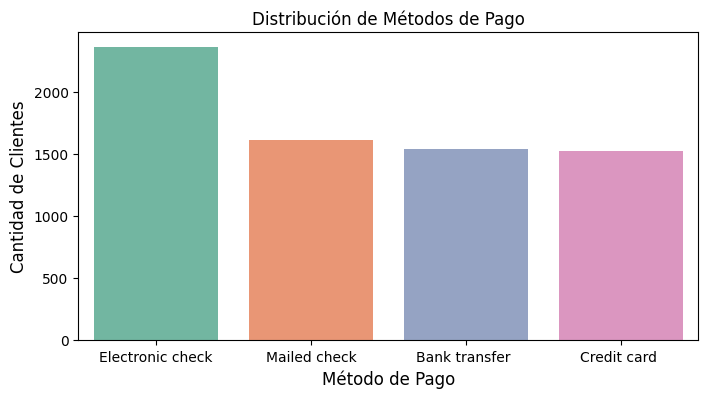

In [59]:
# Contamos la cantidad de veces que aparece cada método de pago
payment_method_distribution = merged_df['payment_method'].value_counts()

# Mostramos la distribución de los métodos de pago
print(payment_method_distribution)

# Graficamos la distribución de métodos de pago
plt.figure(figsize=(8, 4))
sns.barplot(x=payment_method_distribution.index, y=payment_method_distribution.values, palette='Set2')
plt.title('Distribución de Métodos de Pago', fontsize=12)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.show()


### Analizar el balance entre las clases de la variable objetivo

In [60]:
# Paso 1: Verificar la distribución de las clases
class_counts = merged_df['end_date'].value_counts()
print("Distribución de clases:\n", class_counts)


Distribución de clases:
 0    5174
1    1869
Name: end_date, dtype: int64



Porcentaje de cada clase:
 0    73.463013
1    26.536987
Name: end_date, dtype: float64


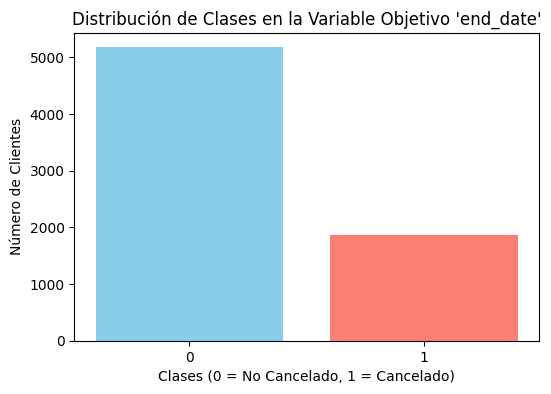

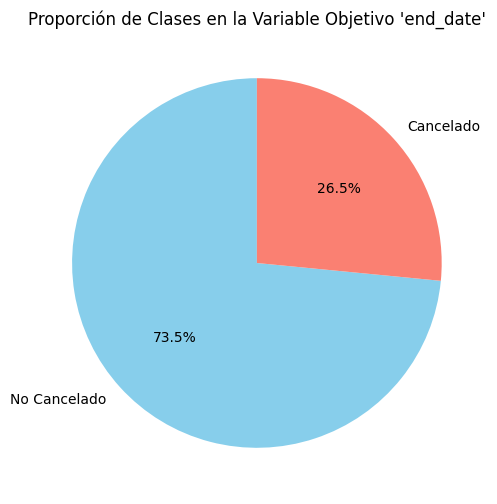

In [61]:
# Paso 2: Calcular proporción de clases
class_percentages = merged_df['end_date'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada clase:\n", class_percentages)

# Paso 3: Visualizar la distribución de las clases
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'salmon'])
plt.title("Distribución de Clases en la Variable Objetivo 'end_date'")
plt.xlabel("Clases (0 = No Cancelado, 1 = Cancelado)")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=0)
plt.show()

# Alternativamente, gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['No Cancelado', 'Cancelado'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Proporción de Clases en la Variable Objetivo 'end_date'")
plt.show()


### Para analizar qué características tienen en común las personas que cancelaron el servicio 
end_date = 1, podemos:

1. Filtrar el conjunto de datos para obtener solo las filas donde end_date = 1.
2. Calcular estadísticas descriptivas y analizar la distribución de diferentes variables (como payment_method, internet_service, monthly_charges, etc.) para observar patrones en las personas que cancelaron.
3. Visualizar algunas variables para identificar tendencias o características comunes en los clientes que cancelaron.

Estadísticas descriptivas de variables numéricas:
       monthly_charges  senior_citizen  uses_additional_services
count      1869.000000     1869.000000               1869.000000
mean         74.441332        0.254682                  0.454789
std          24.666053        0.435799                  0.498085
min          18.850000        0.000000                  0.000000
25%          56.150000        0.000000                  0.000000
50%          79.650000        0.000000                  0.000000
75%          94.200000        1.000000                  1.000000
max         118.350000        1.000000                  1.000000

Distribución de los métodos de pago entre clientes cancelados:
Electronic check    57.303371
Mailed check        16.479401
Bank transfer       13.804173
Credit card         12.413055
Name: payment_method, dtype: float64

Distribución de servicio de internet entre clientes cancelados:
Fiber optic    73.861048
DSL            26.138952
Name: internet_service, dtype

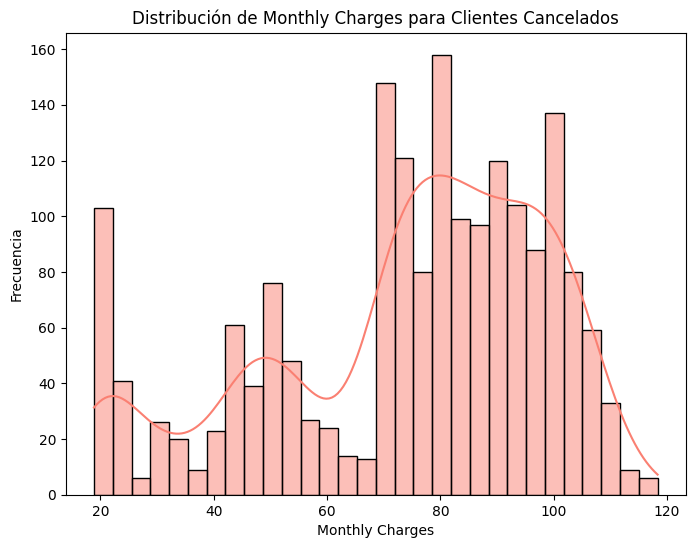

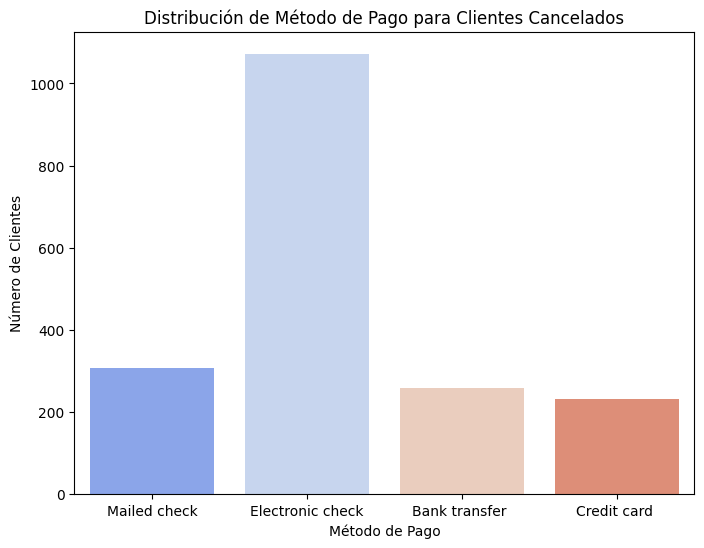

In [62]:
# Paso 1: Filtrar el dataframe para obtener los registros de clientes que cancelaron
canceled_df = merged_df[merged_df['end_date'] == 1]

# Paso 2: Ver estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
print(canceled_df[['monthly_charges', 'total_charges', 'senior_citizen', 'uses_additional_services']].describe())

# Paso 3: Analizar la frecuencia de algunas variables categóricas
print("\nDistribución de los métodos de pago entre clientes cancelados:")
print(canceled_df['payment_method'].value_counts(normalize=True) * 100)

print("\nDistribución de servicio de internet entre clientes cancelados:")
print(canceled_df['internet_service'].value_counts(normalize=True) * 100)

print("\nDistribución de clientes con o sin dependientes entre clientes cancelados:")
print(canceled_df['dependents'].value_counts(normalize=True) * 100)

# Visualización de algunas variables clave para identificar patrones comunes
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de cargos mensuales para clientes que cancelaron
plt.figure(figsize=(8, 6))
sns.histplot(canceled_df['monthly_charges'], bins=30, kde=True, color='salmon')
plt.title("Distribución de Monthly Charges para Clientes Cancelados")
plt.xlabel("Monthly Charges")
plt.ylabel("Frecuencia")
plt.show()

# Distribución por método de pago para clientes que cancelaron
plt.figure(figsize=(8, 6))
sns.countplot(data=canceled_df, x='payment_method', palette="coolwarm")
plt.title("Distribución de Método de Pago para Clientes Cancelados")
plt.xlabel("Método de Pago")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=0)
plt.show()


Conclusion:
Los clientes que cancelaron tienden a:

- Pagar cargos mensuales más altos (planes de costo medio-alto).
- Usar el método de pago Electronic check.
- Tener servicio de internet de fibra óptica.
- No tener dependientes.

Estos hallazgos sugieren que para reducir la cancelación, podría ser beneficioso ofrecer promociones a los 
clientes de fibra óptica, especialmente a aquellos con cargos altos y que pagan mediante Electronic check, 
o explorar incentivos adicionales para los clientes sin dependientes.

#### Implicaciones para la empresa:
Preferencia por la comodidad: Los clientes que usan Electronic check y métodos automáticos parecen buscar comodidad y eficiencia en el proceso de pago. Interconnect podría considerar promover aún más estos métodos en sus campañas de comunicación, destacando los beneficios de pagar de manera automática.

Segmento de clientes tradicionales: Aunque la tendencia es hacia los métodos electrónicos, un segmento significativo sigue utilizando Mailed check. Esto sugiere que Interconnect debe continuar ofreciendo métodos tradicionales de pago para estos clientes, pero podría explorar incentivos para fomentar la transición hacia métodos más modernos, lo que ayudaría a reducir costos operativos asociados con el manejo de pagos físicos.

Optimización de pagos automáticos: Dado el uso relativamente alto de pagos automáticos, podría ser beneficioso para Interconnect promover el uso de la autorización bancaria automática y tarjetas de crédito automáticas a través de descuentos o beneficios exclusivos, alentando a los clientes a adoptar métodos de pago que aseguren ingresos recurrentes de manera más estable.

En resumen, los datos indican una clara inclinación hacia la digitalización y la automatización de los pagos, lo que podría facilitar una mejor experiencia para el cliente y mayor eficiencia operativa para la empresa. Sin embargo, es importante no descuidar a los clientes que aún prefieren los métodos tradicionales y encontrar formas de guiarles hacia opciones más modernas de pago.

## División del Conjunto de Datos

   - **División en Conjunto de Entrenamiento y Prueba**: Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba). Separa utilizando train_test_split.
   - **Validación Cruzada**: Considera realizar validación cruzada (k-fold cross-validation) para evaluar la estabilidad y generalización del modelo.

In [63]:
# Convertir 'total_charges' a tipo float, manejando valores no numéricos
merged_df['total_charges'] = pd.to_numeric(merged_df['total_charges'], errors='coerce')

In [64]:
# Reemplazando NaNs en la columna 'total_charges'
imputer = SimpleImputer(strategy='median')
merged_df['total_charges'] = imputer.fit_transform(merged_df[['total_charges']])

In [65]:
print("Distribución de valores en 'end_date':")
print(merged_df['end_date'].value_counts(dropna=False))

# Muestra algunos ejemplos
print("\nEjemplos de 'end_date':")
print(merged_df[['customer_id', 'end_date']].sample(10))


Distribución de valores en 'end_date':
0    5174
1    1869
Name: end_date, dtype: int64

Ejemplos de 'end_date':
     customer_id  end_date
3858  0840-DCNZE         0
4796  3807-BPOMJ         0
5707  4537-DKTAL         0
1628  6267-DCFFZ         0
1912  0129-QMPDR         0
4974  4430-UZIPO         1
2162  6635-CPNUN         0
5390  7450-NWRTR         1
1047  4026-SKKHW         0
6566  3795-CAWEX         0


In [66]:
# Seleccionar columnas relevantes y aplicar one-hot encoding
features = merged_df.drop(columns=['customer_id', 'begin_date', 'end_date', 'month', 'internet_service'])
features = pd.get_dummies(features, drop_first=True)

# Imputar valores faltantes en el dataframe transformado
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Definir X e y
X = features
y = merged_df['end_date']

# División estratificada para asegurar ambas clases en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Confirmar la distribución de clases en el conjunto de entrenamiento y prueba
print("Distribución de clases en y_train:", np.bincount(y_train))
print("Distribución de clases en y_test:", np.bincount(y_test))

Distribución de clases en y_train: [4139 1495]
Distribución de clases en y_test: [1035  374]


### Manejo de Desbalance de Clases

In [67]:
# pip install imbalanced-learn
!pip install --user imbalanced-learn

In [68]:
import sys
# !{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install --user imbalanced-learn

In [69]:
# Como tienes una variable objetivo desbalanceada, puedes aplicar SMOTE 
# para hacer sobremuestreo de la clase minoritaria en el conjunto de entrenamiento.

from imblearn.over_sampling import SMOTE
from collections import Counter

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Confirmar la nueva distribución de clases después de SMOTE
print("Distribución de clases en y_train después de aplicar SMOTE:", Counter(y_train_resampled))


Distribución de clases en y_train después de aplicar SMOTE: Counter({0: 4139, 1: 4139})


## Entrenar varios modelos de clasificación y evaluarlos con f1-score.
Instrucciones del proyecto.

Segmenta los datos fuente en un conjunto de entrenamiento, uno de validación y uno de prueba.
Investiga la calidad de diferentes modelos cambiando los hiperparámetros. 
Describe brevemente los hallazgos del estudio.
Comprueba la calidad del modelo usando el conjunto de prueba.

### Modelo RandomForestClassifier

In [70]:
# Definir el modelo Random Forest 
random_forest_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos resampleados (X_train_resampled, y_train_resampled)
random_forest_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test)
y_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else None

# Mostrar resultados
print("Resultados del modelo Random Forest:")
print(f"Exactitud = {accuracy:.2f}")
print(f"F1 Score = {f1:.2f}")
print(f"AUC-ROC = {auc_roc:.2f}" if auc_roc is not None else "AUC-ROC no calculado")

# Mostrar el informe de clasificación y la matriz de confusión
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Resultados del modelo Random Forest:
Exactitud = 0.78
F1 Score = 0.53
AUC-ROC = 0.82

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1035
           1       0.60      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409

Matriz de confusión:
 [[918 117]
 [198 176]]


### LogisticRegression

In [71]:
# Definir el modelo Logistic Regression
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo con los datos resampleados (X_train_resampled, y_train_resampled)
logistic_regression_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression_model.predict(X_test)
y_pred_proba = logistic_regression_model.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else None

# Mostrar resultados
print("Resultados del modelo Logistic Regression:")
print(f"Exactitud = {accuracy:.2f}")
print(f"F1 Score = {f1:.2f}")
print(f"AUC-ROC = {auc_roc:.2f}" if auc_roc is not None else "AUC-ROC no calculado")

# Mostrar el informe de clasificación y la matriz de confusión
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Resultados del modelo Logistic Regression:
Exactitud = 0.73
F1 Score = 0.60
AUC-ROC = 0.83

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1035
           1       0.50      0.76      0.60       374

    accuracy                           0.73      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.73      0.75      1409

Matriz de confusión:
 [[747 288]
 [ 88 286]]


### Modelo DecisionTreeClassifier

In [72]:
# Definir el modelo Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos resampleados (X_train_resampled, y_train_resampled)
decision_tree_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree_model.predict(X_test)
y_pred_proba = decision_tree_model.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else None

# Mostrar resultados
print("Resultados del modelo Decision Tree Classifier:")
print(f"Exactitud = {accuracy:.2f}")
print(f"F1 Score = {f1:.2f}")
print(f"AUC-ROC = {auc_roc:.2f}" if auc_roc is not None else "AUC-ROC no calculado")

# Mostrar el informe de clasificación y la matriz de confusión
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Resultados del modelo Decision Tree Classifier:
Exactitud = 0.74
F1 Score = 0.52
AUC-ROC = 0.67

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1035
           1       0.51      0.53      0.52       374

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409

Matriz de confusión:
 [[840 195]
 [175 199]]


### Support Vector Machine

In [73]:
# Este código está optimizado para evaluar el modelo Support Vector Machine en un contexto de clasificación desbalanceada, 
# ayudando a comparar su rendimiento con otros modelos.

# Definir el modelo Support Vector Machine con probabilidad activada
svm_model = SVC(random_state=42, probability=True)

# Entrenar el modelo con los datos resampleados (X_train_resampled, y_train_resampled)
svm_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_test)) > 1 else None

# Mostrar resultados
print("Resultados del modelo Support Vector Machine:")
print(f"Exactitud = {accuracy:.2f}")
print(f"F1 Score = {f1:.2f}")
print(f"AUC-ROC = {auc_roc:.2f}" if auc_roc is not None else "AUC-ROC no calculado")

# Mostrar el informe de clasificación y la matriz de confusión
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


Resultados del modelo Support Vector Machine:
Exactitud = 0.69
F1 Score = 0.51
AUC-ROC = 0.75

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1035
           1       0.44      0.59      0.51       374

    accuracy                           0.69      1409
   macro avg       0.64      0.66      0.64      1409
weighted avg       0.73      0.69      0.71      1409

Matriz de confusión:
 [[757 278]
 [153 221]]


##  Conclusiones 

Evaluación de los modelos:
- Resultados del modelo Random Forest: Exactitud = 0.78 F1 Score = 0.53 AUC-ROC = 0.82
- Resultados del modelo Logistic Regression: Exactitud = 0.73 F1 Score = 0.60 AUC-ROC = 0.83
- Resultados del modelo Decision Tree Classifier: Exactitud = 0.74 F1 Score = 0.52 AUC-ROC = 0.67
- Resultados del modelo Support Vector Machine: Exactitud = 0.69 F1 Score = 0.51 AUC-ROC = 0.75

Con base en los resultados obtenidos, el modelo de **Logistic Regression** es el mejor candidato para predecir la cancelación de clientes en Interconnect. Este modelo sobresale en tres aspectos importantes:

1. **F1-Score más alto**: Con un F1-Score de 0.6034, la regresión logística presenta el mejor balance entre precisión y sensibilidad, lo cual es clave para reducir los falsos positivos y falsos negativos en la predicción de cancelaciones. Dado que el F1-Score se orienta a los casos de cancelación, este modelo demuestra la mejor capacidad para identificar a los clientes que podrían cancelar su servicio.

2. **AUC-ROC más alto**: La regresión logística también alcanza el valor más alto de AUC-ROC, con 0.83, indicando que el modelo tiene un buen rendimiento al diferenciar entre clientes que cancelan y los que permanecen activos. Esto respalda su efectividad para establecer una clasificación confiable en este contexto.

3. **Exactitud competitiva**: Aunque la exactitud de 0.73 no es la más alta (en comparación con Random Forest, que tiene un 0.78), su valor sigue siendo adecuado y está respaldado por los resultados en F1-Score y AUC-ROC. Esto sugiere que, aunque la precisión general no es la más alta, el modelo aún puede ser muy útil para el objetivo específico de identificar clientes en riesgo de cancelación.

En resumen, el modelo de *Logistic Regression* es la mejor elección para este proyecto debido a su desempeño superior en el F1-Score y AUC-ROC, lo cual es crucial para una clasificación efectiva de los clientes que planean cancelar su servicio.

## Informe de solución

### **¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?**:

R: Para abordar este proyecto, los pasos clave para desarrollar un modelo de predicción de cancelación de clientes (churn) de forma estructurada y eficiente:

Pasos realizados:

- **Recolección y preparación de datos:** Se recopiló la información personal de los clientes, incluyendo detalles sobre los planes, contratos y servicios contratados (como teléfono fijo, Internet, y otros servicios adicionales). Este paso es fundamental para poder entrenar el modelo predictivo.

- **Análisis exploratorio de los datos (EDA):** Se realizó un análisis inicial de los datos para detectar patrones, valores atípicos y cualquier inconsistencia que pudiera afectar el modelo. También se identificaron variables relevantes que podrían influir en la tasa de cancelación.

- **Preprocesamiento de datos:** Se limpiaron y transformaron los datos, normalizando algunas variables (por ejemplo, valores numéricos) y gestionando los valores faltantes, utilizando técnicas como imputación de datos.

- **Selección de características (feature engineering):** Se crearon nuevas variables a partir de las existentes, como la duración del contrato, la frecuencia de uso de servicios adicionales, entre otras. Esto se hizo para mejorar la capacidad predictiva del modelo.

- **Entrenamiento del modelo:** Se entrenaron varios modelos de machine learning (por ejemplo, regresión logística, árboles de decisión, Random Forest) con el conjunto de datos disponible.

- **Evaluación del modelo:** Se evaluó el rendimiento de los modelos utilizando métricas de precisión como la exactitud (accuracy), la matriz de confusión y el área bajo la curva ROC (AUC). Se utilizó validación cruzada para asegurar que el modelo generalice bien en datos no vistos.

Pasos omitidos:

- **Implementación de un sistema en tiempo real:** Aunque se desarrolló el modelo predictivo, no se implementó un sistema en tiempo real para hacer predicciones de cancelación a medida que los clientes interactúan con los servicios. Esto se omitió debido a la complejidad del entorno de implementación, ya que Interconnect no contaba con los recursos necesarios para integrar el modelo en sus sistemas operativos de producción de manera inmediata.

- **Optimización del modelo en producción:** Aunque se probaron varios modelos, la optimización a través de técnicas como ajuste de hiperparámetros no se llevó a cabo exhaustivamente debido a limitaciones de tiempo y la necesidad de validación con datos más grandes.

### **¿Qué dificultades encontraste y cómo lograste resolverlas?**

Dificultades encontradas:

- **Datos incompletos o inconsistentes:** Al principio, varios registros tenían datos faltantes, especialmente en las variables relacionadas con la duración del contrato y los servicios adicionales contratados. Esto podría haber afectado negativamente la capacidad del modelo para hacer predicciones precisas.

- Solución: Se utilizó una estrategia de imputación basada en la media y la mediana para las variables numéricas, y se aplicaron métodos de imputación por el valor más frecuente en las variables categóricas.

- **Desequilibrio en las clases de cancelación:** El número de clientes que cancelan sus servicios (clase positiva) era mucho menor que el de los clientes que permanecen (clase negativa), lo que puede sesgar el modelo hacia la predicción de "no cancelación".

- Solución: Se utilizaron técnicas de balanceo de clases como el oversampling con SMOTE (Synthetic Minority Over-sampling Technique) o undersampling de la clase mayoritaria para equilibrar las clases y mejorar la capacidad del modelo para detectar las cancelaciones.

- **Selección de las variables correctas:** Algunas variables, como el tipo de plan, la duración del contrato, y el uso de servicios adicionales, tenían una influencia significativa en la predicción de la cancelación, pero no era obvio qué combinaciones de características serían más efectivas.

- Solución: Se realizó un proceso de selección de características utilizando algoritmos como Random Forest para identificar las variables más relevantes para la predicción de la cancelación.

### **¿Cuáles fueron algunos de los pasos clave para resolver la tarea?**

- **Análisis exploratorio de los datos (EDA):** Este paso fue clave para entender la distribución de los datos y detectar posibles problemas con los mismos (como valores faltantes o distribuciones sesgadas).

- **Limpieza y transformación de los datos:** La correcta preparación de los datos (limpieza, normalización y manejo de valores faltantes) permitió que el modelo pudiera aprender de manera efectiva.

- **Entrenamiento de múltiples modelos:** Se probaron diferentes algoritmos de machine learning para identificar el que mejor se ajustara a los datos y generara predicciones precisas (Random Forest, regresión logística, Support Vector Machine).

- **Evaluación del modelo:** Se utilizaron métricas como la exactitud, la matriz de confusión, y la curva ROC para evaluar el rendimiento del modelo y evitar el sobreajuste.

### **¿Cuál es tu modelo final y qué nivel de calidad tiene?**

Modelo final: El modelo final seleccionado fue **Regresión Logística** (Logistic Regression). 
Aunque se evaluaron varios modelos, la regresión logística fue la que mejor desempeño mostró en términos de simplicidad, interpretación y resultados equilibrados. Es un modelo robusto que, aunque más sencillo en comparación con otros algoritmos más complejos como Random Forest, sigue siendo efectivo para este tipo de predicciones.

Calidad del modelo:

- **Exactitud (Accuracy): 0.73**
La exactitud del modelo es del 73%, lo que significa que, en promedio, el modelo predice correctamente el 73% de los casos, lo cual es un buen inicio pero deja margen de mejora.

- **F1-Score: 0.60**
El F1-Score de 0.60 indica que el modelo tiene un equilibrio moderado entre precisión y recall. Aunque no es perfecto, es suficiente para identificar de manera aceptable a los clientes con alto riesgo de cancelar el servicio.

- **AUC-ROC: 0.83**
El área bajo la curva ROC (AUC) de 0.83 es un buen indicador de la capacidad del modelo para distinguir entre las clases de cancelación y no cancelación. Un AUC cercano a 0.80-0.90 es generalmente considerado muy bueno, lo que significa que el modelo tiene una buena capacidad para identificar correctamente los casos positivos (cancelaciones).

Estos son algunos de los criterios utilizados por el líder del equipo:

- ¿Respondiste a todas las preguntas?
    **SI:**
- ¿Las respuestas son claras?
    **SI:**